# Set Up and Loading

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import joblib

# Load the dataset
file_path = './diabetes_risk_prediction_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display basic information
print("=======================================")
print("First 5 Rows of the Dataset:")
print("=======================================")
print(data.head())

print("\n=======================================")
print("Dataset Information:")
print("=======================================")
data.info()

print("\n=======================================")
print("Column Data Types:")
print("=======================================")
print(data.dtypes)

print("\n=======================================")
print("Missing Values Check:")
print("=======================================")
print(data.isnull().sum())

print("\n=======================================")
print("Basic Descriptive Statistics for Numerical Columns:")
print("=======================================")
print(data.describe())

print("\n=======================================")
print("Value Counts for Target Column (Class):")
print("=======================================")
print(data['class'].value_counts())  # Replace 'class' with your actual target column name


First 5 Rows of the Dataset:
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0          

# 2. Data Preprocessing

In [23]:
# Normalize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print("Normalized Columns:")
print(data.columns)

# Handle missing values
print("\nMissing Values Check:")
print(data.isnull().sum())  # Check for missing values
data.fillna(method='ffill', inplace=True)  # Forward fill as an example

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
                    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
                    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
for col in categorical_cols:
    if col in data.columns:  # Ensure the column exists
        data[col] = label_encoder.fit_transform(data[col])

# Encode target variable
if 'class' in data.columns:  # Ensure target column exists
    data['class'] = label_encoder.fit_transform(data['class'])


Normalized Columns:
Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

Missing Values Check:
age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64


C:\Users\kelse\AppData\Local\Temp\ipykernel_15532\3407106011.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an example


# 3. Split and Standardize the Data

In [24]:
# Separate features and target
X = data.drop('class', axis=1)  # Replace 'class' with your target column name
y = data['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)       # Only transform test data

# 4. Exploratory Data Analysis (EDA)

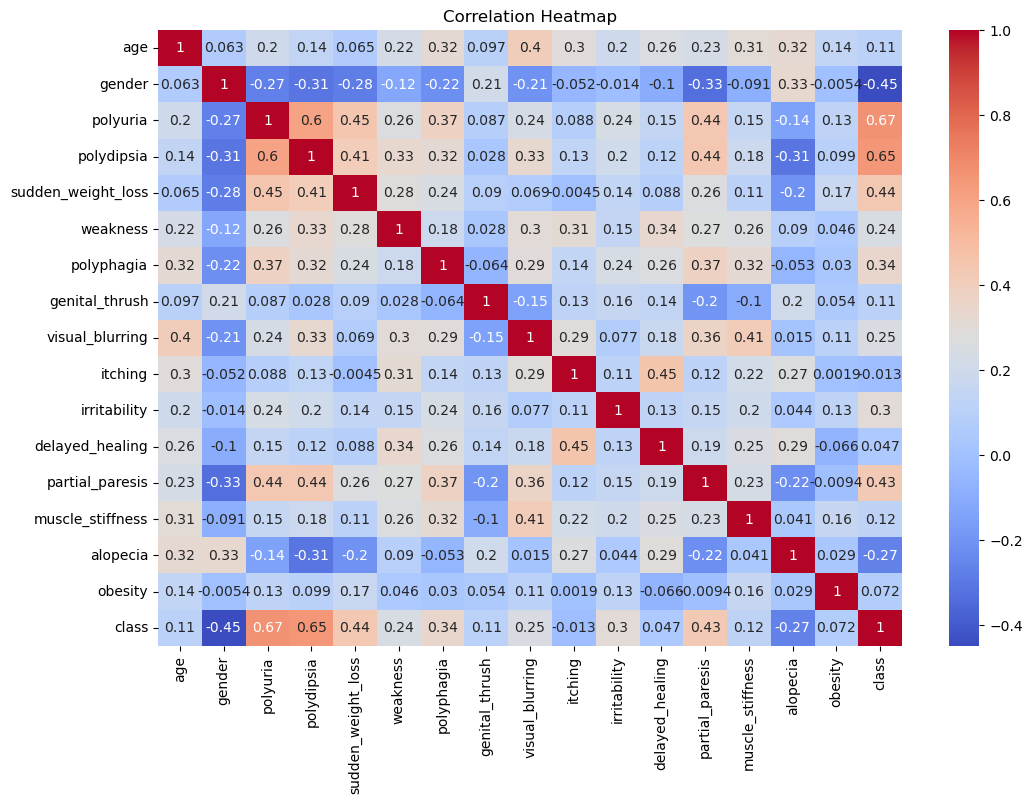

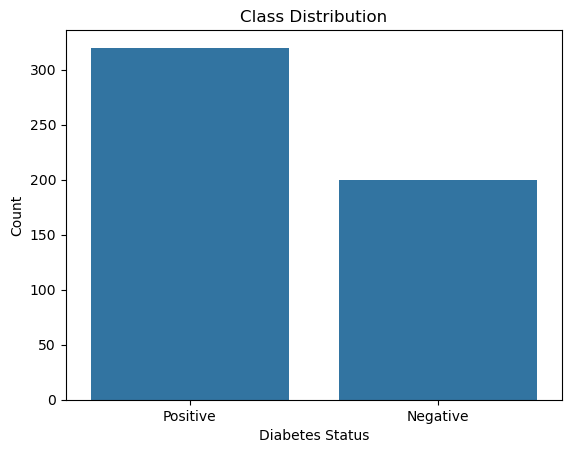

In [25]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Class Distribution
sns.countplot(x=data['class'].map({0: 'Negative', 1: 'Positive'}))
plt.title('Class Distribution')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

# 5. Model Development

In [26]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# 6. Model Evaluation

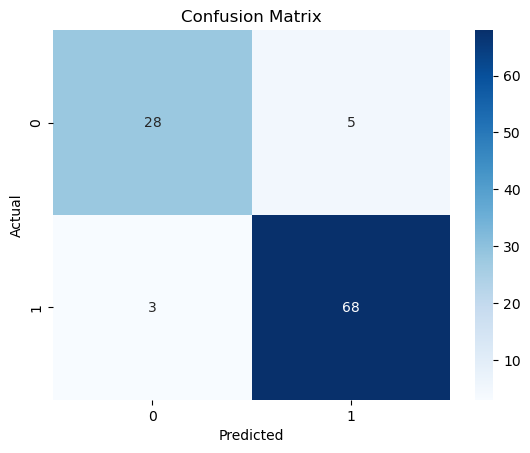


Model Performance Metrics:

╒═══════════╤═════════╕
│ Metric    │   Score │
╞═══════════╪═════════╡
│ Precision │    0.93 │
├───────────┼─────────┤
│ Recall    │    0.96 │
├───────────┼─────────┤
│ F1 Score  │    0.94 │
├───────────┼─────────┤
│ Accuracy  │    0.92 │
╘═══════════╧═════════╛


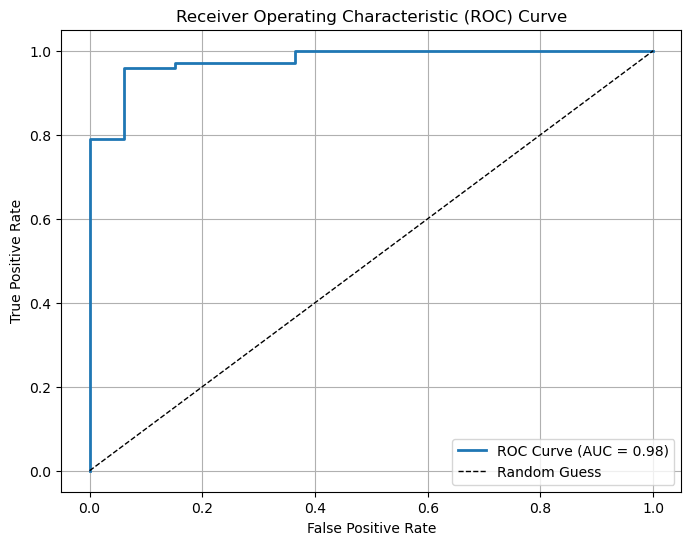

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score
from tabulate import tabulate

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# # Classification Report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Additional Metrics: Precision, Recall, F1-Score, and Accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Organize metrics in a table format
metrics = [
    ["Metric", "Score"],
    ["Precision", f"{precision:.2f}"],
    ["Recall", f"{recall:.2f}"],
    ["F1 Score", f"{f1:.2f}"],
    ["Accuracy", f"{accuracy:.2f}"]
]

# Display the metrics table
print("\nModel Performance Metrics:\n")
print(tabulate(metrics[1:], headers=metrics[0], tablefmt="fancy_grid"))

# ROC-AUC Score and Curve
roc_score = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# 7. Using the Model to Predict Diabetes Risk

In [ ]:
#Prompt the user to submit a row number that they want predicted
while True:
    rowNum = input("Which row's diabetes risk do you want to see? Rows start at 0.")
    rowNum = int(rowNum)
    
    #If number is a valid row number, break the loop
    #data.shape[0] gives the length of dataframe
    if rowNum >= 0 and rowNum < data.shape[0]:
        break
    #Else, tell the user the row number is invalid and continue the loop
    else:
        print("Row number invalid! Please input a valid row number.")

#Get row data
row = data.iloc[rowNum, :]
#Have to change the given Series to a Dataframe to be able to predict
row = row.to_frame()

#Change the rows/columns
row = row.transpose()

#Drop class column
row = row.drop(row.columns[16], axis=1)

#Show the user their chosen row     
print("Your chosen row was:")
print(row)
#For spacing
print("")

#Predict based on the data
predicted = model.predict(row)
actual = data.iloc[rowNum, 16]

#Show the predicted diabetes risk, and the actual diabetes risk for that row
predictText = "The predicted diabetes risk for this row is {predictedClass}.\n"
actualText = "The actual diabetes risk for this row is {actualClass}.\n"

print(predictText.format(predictedClass = predicted))
print(actualText.format(actualClass = actual))

Your chosen row was:
   age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
0   40       1         0           1                   0         1   

   polyphagia  genital_thrush  visual_blurring  itching  irritability  \
0           0               0                0        1             0   

   delayed_healing  partial_paresis  muscle_stiffness  alopecia  obesity  
0                1                0                 1         1        1  

The predicted diabetes risk for this row is [0].

The actual diabetes risk for this row is 1.



c:\Users\kelse\anaconda3\envs\enpyronment\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
